# Demo for Dog Breed Classification

## Import necessary modules

In [1]:
from model_transfer import *
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Download a German Shepherd from Wikipedia and show it

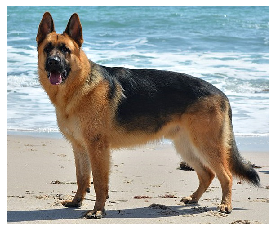

In [2]:
url = 'https://upload.wikimedia.org/wikipedia/commons/0/00/1._DSC_0346_%2810096362833%29.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
_ = plt.axis('off')

## Create PyTorch model and load in the trained weights

In [3]:
model_transfer = create_dog_breed_classification_model()

# Model was trained on GPU so to make this run on a wider range of platforms,
# we should not assume the user has a GPU available - transfer the model to CPU
# https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-on-gpu-load-on-cpu
model_transfer.load_state_dict(torch.load('model_checkpoints/model_transfer.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

## Run inference and let's see what we predict

In [4]:
output = perform_inference(model_transfer, img)

In [5]:
output

'071.German_shepherd_dog'